ValueError: aspect must be finite and positive 

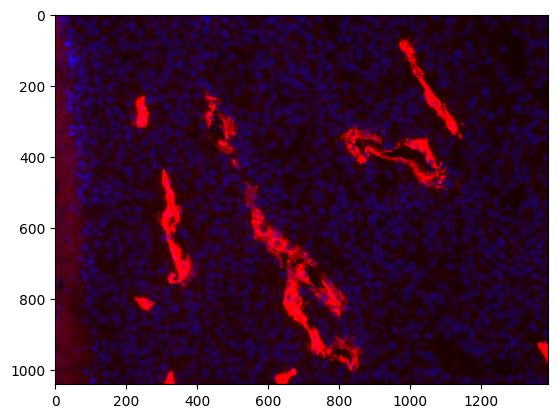

In [19]:
# Step 1: Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.image as mpimg
# Load the image
img = mpimg.imread('/home/chrism/datasets/dapidl/test/endothelialcell/exclude/Ms1759 WT___Snap-161898.png')
# Display the image
plt.imshow(img)
# Load the GeoJSON file
gdf = gpd.read_file('/home/chrism/datasets/dapidl/test/endothelialcell/exclude/Ms1759 WT___Snap-161898.geojson')
# Overlay the GeoJSON data on the image
gdf.plot(ax=plt.gca(), color='none', edgecolor='black')
plt.show()

In [4]:
gdf

,id,objectType,geometry
0,18e1242b-4ed4-439f-a8ca-c690d3437c71,annotation,"POLYGON ((0 430.4, 0 448.4, 0 483.4, 0 515.4, ..."


In [22]:
import geopandas as gpd
import rasterio
import rasterio.features
import numpy as np

height = 1040
width = 1388

imfn = ('/home/chrism/datasets/dapidl/test/endothelialcell/exclude/Ms1759 WT___Snap-161898.png')
geofn = '/home/chrism/datasets/dapidl/test/endothelialcell/exclude/Ms1759 WT___Snap-161898.geojson'

# Load the GeoJSON file
gdf = gpd.read_file(geofn)

# Define the dimensions of the mask
mask = np.zeros((height, width), dtype=np.uint8)

# Convert the GeoJSON geometries into a binary mask
for _, row in gdf.iterrows():
    if row['geometry'] is not None:
        mask |= rasterio.features.rasterize([(row['geometry'], 1)],
                                             out_shape=(height, width))
%qtconsole
# Now, `mask` is a binary mask of the GeoJSON file

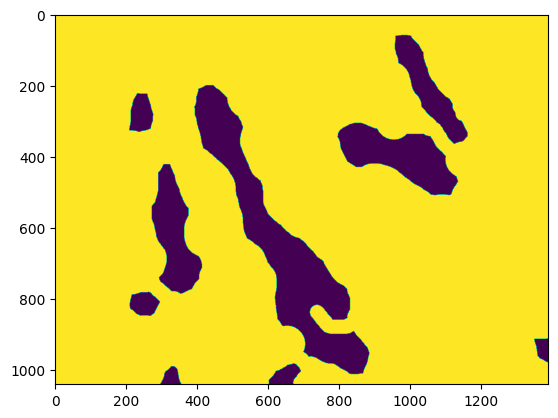

In [24]:
plt.imshow(mask)

In [25]:
mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [6]:
import numpy as np
import cv2
import json
from shapely.geometry import mapping, Polygon

def seg_npy_to_geojson(seg_npy_path, geojson_path):
    # Load segmentation data
    data = np.load(seg_npy_path, allow_pickle=True).item()
    masks = data['masks']
    
    # Prepare GeoJSON structure
    geojson = {
        "type": "FeatureCollection",
        "features": []
    }
    
    # Extract contours and convert to GeoJSON features
    for label in np.unique(masks):
        if label == 0:  # Skip background
            continue
        # Find contours
        contours, _ = cv2.findContours((masks == label).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            # Convert contour to polygon and skip invalid polygons
            if contour.shape[0] < 3:
                continue
            polygon = Polygon(contour.squeeze())
            if not polygon.is_valid:
                continue
            # Add polygon to GeoJSON
            feature = {
                "type": "Feature",
                "properties": {
                    "label": int(label)
                },
                "geometry": mapping(polygon)
            }
            geojson["features"].append(feature)
    
    # Save GeoJSON to file
    with open(geojson_path, 'w') as f:
        json.dump(geojson, f)

# Example usage
seg_npy_path = 'HS3ST1___CD8 12175 HS3ST1___Snap-155268_c1+2+3_seg.npy'
geojson_path = 'HS3ST1___CD8 12175 HS3ST1___Snap-155268_c1+2+3_seg.geojson'
seg_npy_to_geojson(seg_npy_path, geojson_path)

ValueError: too many values to unpack (expected 2)